In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import mean_squared_error, make_scorer, r2_score, mean_absolute_error









import warnings
warnings.filterwarnings("ignore")


In [17]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
df2 = pd.read_csv("Housing_data_CPH.csv", sep=";")
print("Shape: ",df2.shape)
df2.head()

Shape:  (72282, 28)


,Årmåned_salg,case_type_dk,municipality_name,zip_code,zip_code_name,erts89_utm32_x,erts89_utm32_y,ed50_x,ed50_y,wgs84_lat,wgs84_lon,grundareal,boligareal,vægtet_areal,energimærke_påkrævet,energimærke,antvandskyltoilleter,opvarmningskode,varmeinstallationskode,ydervægkode,byggeår,renoveringsår,md_ejerudgifter,første_udbudspris,senest_annonceret_pris,tinglyst_pris,dage_på_markedet_v_seneste_mægler,dage_på_markedet_v_alle_mæglere
0,201806,Rækkehus,København,2100,København Ø,724661.3697431379,6177506.430197247,724743.4370031202,6177712.574576871,"55,69122405","12,57460491",74.0,144,159,False,e,2,9999,9999,1,1882.0,NaN,5321.0,9500000,9500000,9600000,NaN,NaN
1,201906,Rækkehus,København,2100,København Ø,724656.3099617342,6177510.129902037,724738.3771995398,6177716.274317907,"55,69125957","12,57452761",75.0,121,136.4499969482422,False,NaN,2,9999,9999,1,1882.0,NaN,5362.0,9998000,9998000,9350000,NaN,NaN
2,201805,Rækkehus,København,2100,København Ø,724656.3099617342,6177510.129902037,724738.3771995398,6177716.274317907,"55,69125957","12,57452761",75.0,121,136,True,c,2,9999,9999,1,1882.0,NaN,5324.0,9895000,9500000,8500000,79.0,79.0
3,201805,Rækkehus,København,2100,København Ø,724612.6998841494,6177539.480294425,724694.7669242901,6177745.625006782,"55,69154296","12,57385928",75.0,136,151,True,c,2,9999,9999,5,1882.0,1974.0,5469.0,9595000,9195000,8750000,96.0,96.0
4,202006,Villa,København,2300,København S,726339.2701369224,6172005.4193364065,726421.3337691108,6172211.5248479135,"55,64111328","12,59671021",409.0,107,126,True,d,1,9999,9999,1,1927.0,NaN,4434.0,4195000,3995000,3900000,148.0,148.0


In [18]:
df2.rename(columns={'Årmåned_salg': 'yearMonth_sale' , 'grundareal': 'ground_area', 'boligareal':'residental_area', 'vægtet_areal':'measured_area',
       'energimærke_påkrævet':'energy_labeled_required', 'energimærke':'energy_labeled', 'antvandskyltoilleter':'amount_of_toilets',
       'opvarmningskode':'heating_code', 'varmeinstallationskode':'heating_installation_code', 'ydervægkode':'exterior_wall_code', 'byggeår':'year_of_construction',
       'renoveringsår':'renovation_year', 'md_ejerudgifter':'owner_expenses', 'første_udbudspris':'first_offer_price',
       'senest_annonceret_pris':'lastest_announced_price', 'tinglyst_pris':'sold_price','dage_på_markedet_v_seneste_mægler':'days_on_the_market_latest_broker', 'dage_på_markedet_v_alle_mæglere':'days_on_the_market_all_broker'}, inplace=True)
df2.head(50)

,yearMonth_sale,case_type_dk,municipality_name,zip_code,zip_code_name,erts89_utm32_x,erts89_utm32_y,ed50_x,ed50_y,wgs84_lat,wgs84_lon,ground_area,residental_area,measured_area,energy_labeled_required,energy_labeled,amount_of_toilets,heating_code,heating_installation_code,exterior_wall_code,year_of_construction,renovation_year,owner_expenses,first_offer_price,lastest_announced_price,sold_price,days_on_the_market_latest_broker,days_on_the_market_all_broker
0,201806,Rækkehus,København,2100,København Ø,724661.3697431379,6177506.430197247,724743.4370031202,6177712.574576871,"55,69122405","12,57460491",74.0,144,159,False,e,2,9999,9999,1,1882.0,NaN,5321.0,9500000,9500000,9600000,NaN,NaN
1,201906,Rækkehus,København,2100,København Ø,724656.3099617342,6177510.129902037,724738.3771995398,6177716.274317907,"55,69125957","12,57452761",75.0,121,136.4499969482422,False,NaN,2,9999,9999,1,1882.0,NaN,5362.0,9998000,9998000,9350000,NaN,NaN
2,201805,Rækkehus,København,2100,København Ø,724656.3099617342,6177510.129902037,724738.3771995398,6177716.274317907,"55,69125957","12,57452761",75.0,121,136,True,c,2,9999,9999,1,1882.0,NaN,5324.0,9895000,9500000,8500000,79.0,79.0
3,201805,Rækkehus,København,2100,København Ø,724612.6998841494,6177539.480294425,724694.7669242901,6177745.625006782,"55,69154296","12,57385928",75.0,136,151,True,c,2,9999,9999,5,1882.0,1974.0,5469.0,9595000,9195000,8750000,96.0,96.0
4,202006,Villa,København,2300,København S,726339.2701369224,6172005.4193364065,726421.3337691108,6172211.5248479135,"55,64111328","12,59671021",409.0,107,126,True,d,1,9999,9999,1,1927.0,NaN,4434.0,4195000,3995000,3900000,148.0,148.0
5,202103,Villa,København,2300,København S,726314.7447286966,6171972.668490626,"726396,8081",6172178.773859339,"55,64083099","12,5962944",426.0,140,136,True,a2015,2,9999,9999,80,2017.0,NaN,4613.0,7495000,7495000,7595000,17.0,17.0
6,201108,Villa,København,2700,Brønshøj,718735.9998927611,6178448.999985718,718818.0324674495,6178655.165567457,"55,70238375","12,48127579",970.0,87,259,True,g,2,9999,9999,1,1928.0,NaN,NaN,2250000,2250000,2275000,15.0,15.0
7,201912,Villa,København,2500,Valby,719959.2023814355,6174355.663413339,720041.2320496305,"6174561,8","55,66511917","12,49742126",391.0,107,132,True,f,2,9999,9999,5,1914.0,NaN,6092.0,6498000,6498000,6825000,4.0,4.0
8,201202,Villa,København,2500,Valby,719803.7621381008,6174318.587565216,719885.7907358984,6174524.724455848,"55,66485698","12,4949252",474.0,143,170,True,d,1,9999,9999,1,1930.0,1966.0,NaN,4675000,4675000,4450000,65.0,627.0
9,202201,Rækkehus,København,2300,København S,728076.8752870476,6173143.500418007,"728158,9527",6173349.608616426,"55,65050734","12,62520423",174.0,85,102,True,c,1,9999,9999,1,1943.0,NaN,3963.0,4995000,4995000,5150000,16.0,16.0


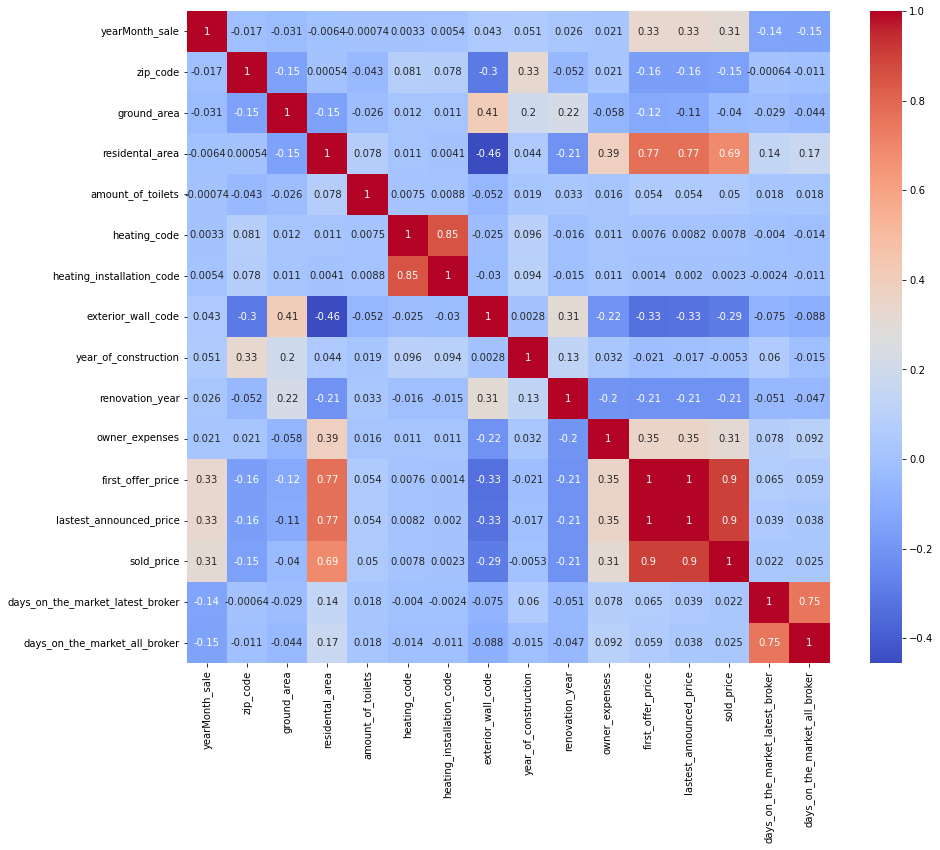

In [21]:

# Create correlation matrix
corr_matrix = df2.corr()

# Set figure size and background color
fig, ax = plt.subplots(figsize=(14.4, 12))
fig.set_facecolor('white')

# Create heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", ax=ax)


# Save the figure as an image file (e.g., PNG, JPEG, etc.)
plt.savefig('correlation_matrix_initial.png', format='png')

# Display the plot
plt.show()